In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
db = pd.read_csv("winequality-red.csv")

<Axes: >

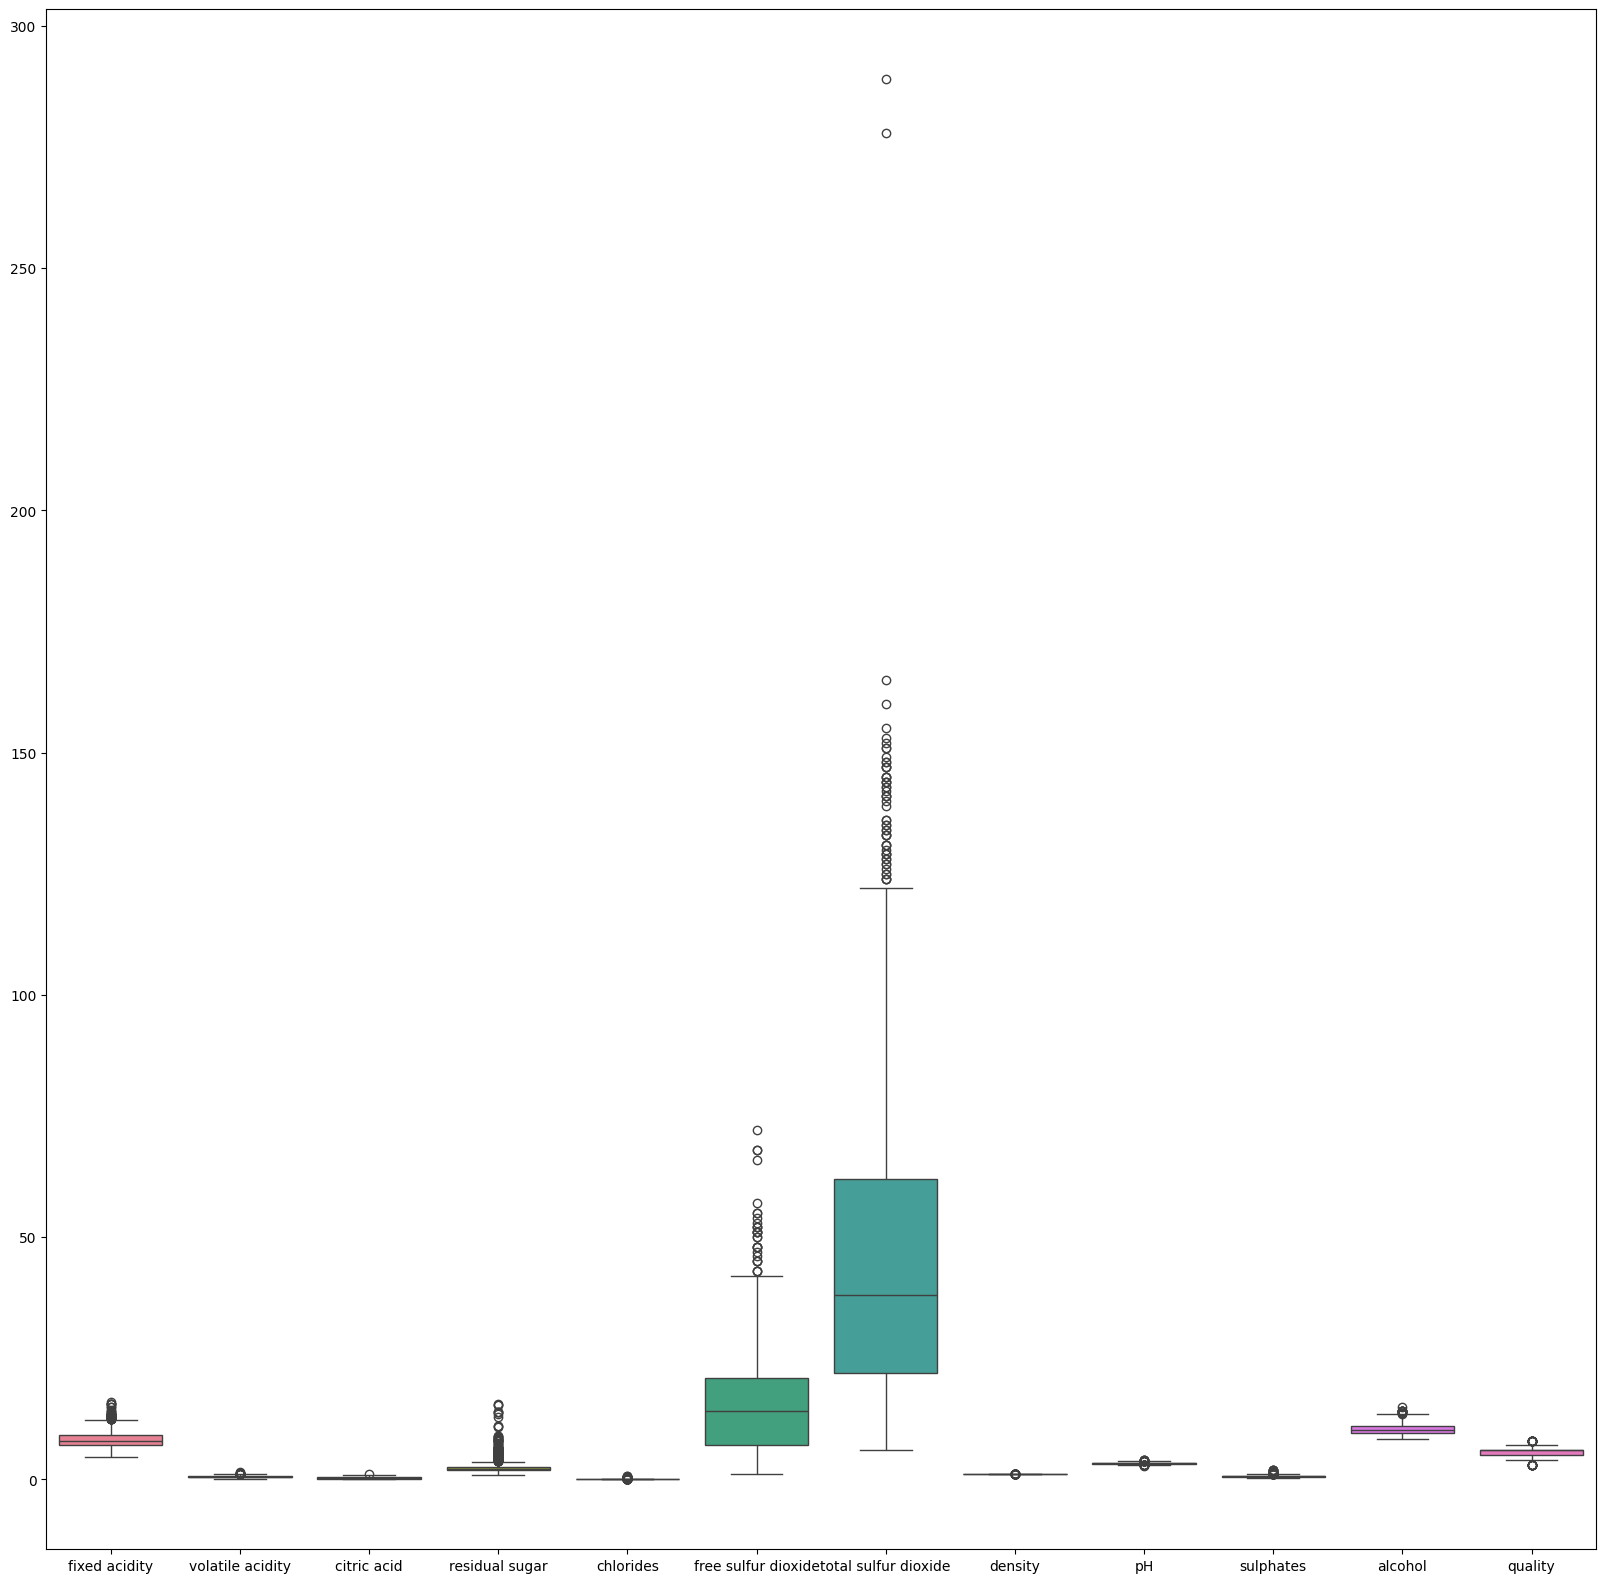

In [3]:
plt.figure(figsize = (20,20))
sns.boxplot(db)

In [4]:
db.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [5]:
def outlierRemover(data):
    column = np.array(data)
    Q1 = data.quantile(0.3)
    Q3 = data.quantile(0.7)
    IQR = Q3-Q1
    low = Q1-1.5*IQR
    upp = Q3+1.5*IQR
    outliers = []
    for i in column:
        if(i<low or i>upp):
            outliers.append(i)

    return outliers

In [6]:
for i in db.columns[:-1]:
    outliers = outlierRemover(db[i])
    db[i] = db[i].replace(outliers,np.nan)

In [7]:
db = db.dropna()

In [8]:
X_ = db.drop(["quality"],axis=1)
Y_ = db["quality"]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X_,Y_,random_state=604,test_size=0.2)

In [10]:
def normalize(col):
    col=np.array(col)
    m=np.mean(col)
    s=np.std(col)
    for i in range(col.shape[0]):
        col[i]=(col[i]-m)/s
    return col

In [11]:
for i in x_train.columns:
    x_train[i]=normalize(x_train[i])
for i in x_test.columns:
    x_test[i]=normalize(x_test[i])

<Axes: >

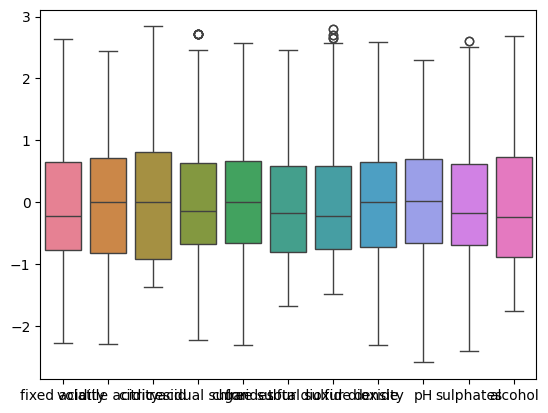

In [12]:
sns.boxplot(x_train)

In [13]:
L = 0.1
epochs = 1000
weight = None

In [14]:
 def one_hot_encoding(Y):
        OneHotEncoding = []
        encoding = []
        for i in range(len(Y)):
            if(Y[i] == 8): 
                encoding = np.array([0,0,0,0,0,1])
            elif(Y[i] == 7): 
                encoding = np.array([0,0,0,0,1,0])
            elif(Y[i] == 6): 
                encoding = np.array([0,0,0,1,0,0])
            elif(Y[i] == 5): 
                encoding = np.array([0,0,1,0,0,0])
            elif(Y[i] == 4): 
                encoding = np.array([0,1,0,0,0,0])
            elif(Y[i] == 3): 
                encoding = np.array([1,0,0,0,0,0])
                
            OneHotEncoding.append(encoding)
        return OneHotEncoding

In [15]:
def cost(n,Ti,Oi):
        result = np.mean(Ti * np.log(Oi))
        return -result

In [16]:
def softmax(z):
        soft = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T 
        return soft

In [17]:
def fit(X,y):
        n,m = X.shape
        weights = np.ones((m,6))
        bias = np.zeros((1,6))
        Ti = one_hot_encoding(y)
        for i in range(0,epochs):
            Z = np.matmul(X,weights) + bias
            Oi = softmax(Z)
            dw = -(np.dot(X.T,(Ti - Oi)))/n 
            db = -(Ti - Oi).sum(0,keepdims = True)/n 
            weights -= L*dw            
            bias -= L*db
            erro = cost(n,Ti,Oi)
            if(i % 100 == 0):
                print("Epoch ",i," Total Error:", "%.4f" % erro)
        return weights , bias

In [18]:
def get_prob(X,y,weight,bias):
        Z = np.matmul(X, weight)+bias
        Oi = softmax(Z)
        return Oi

In [19]:
y_train = np.array(y_train)
x_train = np.array(x_train)

In [20]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [21]:
weight , bias = fit(x_train,y_train)

Epoch  0  Total Error: 0.2986
Epoch  100  Total Error: 0.1609
Epoch  200  Total Error: 0.1502
Epoch  300  Total Error: 0.1464
Epoch  400  Total Error: 0.1444
Epoch  500  Total Error: 0.1432
Epoch  600  Total Error: 0.1424
Epoch  700  Total Error: 0.1418
Epoch  800  Total Error: 0.1413
Epoch  900  Total Error: 0.1409


In [22]:
prob = get_prob(x_test,y_test,weight,bias)

In [23]:
prob

array([[0.00465134, 0.00337284, 0.24636905, 0.60784204, 0.13265145,
        0.00511328],
       [0.00394973, 0.01551986, 0.73198365, 0.24451951, 0.00217513,
        0.00185211],
       [0.00575398, 0.06616629, 0.58732765, 0.32671814, 0.00746789,
        0.00656604],
       ...,
       [0.0043514 , 0.00240834, 0.09854099, 0.63845058, 0.24423354,
        0.01201515],
       [0.00820664, 0.01326832, 0.37117541, 0.55913053, 0.03782419,
        0.01039491],
       [0.00521463, 0.01742048, 0.33444721, 0.58616474, 0.03793362,
        0.01881931]])

In [24]:
def decode (prob):
    n,m = prob.shape
    ans = []
    for i in range(0,n):
        mx = max(prob[i][0],prob[i][1],prob[i][2],prob[i][3],prob[i][4],prob[i][5])
        if(mx == prob[i][0]):
            ans.append(3)
        elif(mx == prob[i][1]):
            ans.append(4)
        elif(mx == prob[i][2]):
            ans.append(5)
        elif(mx == prob[i][3]):
            ans.append(6)
        elif(mx == prob[i][4]):
            ans.append(7)
        elif(mx == prob[i][5]):
            ans.append(8)
    return ans

In [25]:
ans = decode(prob)

In [26]:
accuracy = accuracy_score(y_test,ans)*100
print("Accuracy: %.4f" % accuracy,"%")

Accuracy: 66.6667 %
